# 50.007 Machine Learning HW2
**Name**: Ryan Toh (1005129)

## 1. K-Means

In [120]:
import numpy as np
from typing import List, Tuple
from PIL import Image
import matplotlib.pyplot as plt

data = np.array([])
# data will be an array of rows, with each row being the r, g, b values
with Image.open("./data/1/hw2_img.jpg") as im:
    im.convert("RGB")
    data = np.asarray(im.getdata(), dtype=np.float32)

cluster_count = 8
initial_centroids = [
    np.array([255, 255, 255]),
    np.array([255,   0,   0]),
    np.array([128,   0,   0]),
    np.array([  0, 255,   0]),
    np.array([  0, 128,   0]),
    np.array([  0,   0, 255]),
    np.array([  0,   0, 128]),
    np.array([  0,   0,   0]),
]

### 1.1. Helper Functions


In [121]:
def get_euclidean_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    """
    Returns the Euclidean distance between `p1` and `p2`.
    """
    distance_vector = p1 - p2
    squared_dist = np.dot(distance_vector, distance_vector.T)
    return np.sqrt(squared_dist)

In [122]:
def get_cost(data: np.ndarray, clusters: List[List[int]], centroids: List[np.ndarray]) -> float:
    """
    Returns the overall cost, given a list of clusters `clusters` and a list of corresponding centroids `centroids`.
    """

    def get_distortion(data: np.ndarray, cluster: List[int], centroid: np.ndarray) -> float:
        """
        Returns the distortion associated with `cluster`, with the given `centroid`.
        - `cluster` is a `List` of indices, which reference points in `data`.
        """
        sum = 0.0
        for point_index in cluster:
            point = data[point_index]
            sum += get_euclidean_distance(point, centroid)
        return sum
    
    cost = 0.0
    for i in range(len(clusters)):
        cluster = clusters[i]
        centroid = centroids[i]
        cost += get_distortion(data, cluster, centroid)
    return cost

In [125]:
def k_means_algo(data: np.ndarray, cluster_count: int, initial_centroids: List[np.ndarray], max_iter:int = -1) -> Tuple[List[List[np.ndarray]], List[np.ndarray], List[float]]:
    """
    Executes the k-means algorithm on `data` with a cluster count of `cluster_count` and initial centroids as a list `initial_centroids`.
    Returns a tuple, consisting of:
    - A list of clusters (where each cluster is itself a list of `int`s)
        - In each cluster, each `int` represents the index of the point in the cluster in `data`.
    - A list of centroids (where each centroid is an `np.ndarray`)
    - A list of costs for every iteration
    """

    # Initialisation
    centroids = initial_centroids.copy()
    clusters = []
    costs = []
    
    # Repeat iterations
    last_cost = -1
    iteration_count = 0
    while True:
        # Re-initialise clusters
        clusters = []
        for i in range(cluster_count):
            clusters.append([])

        # Step 1: Fix centroids, add points to clusters
        for index in range(len(data)):
            point = data[index]
            # Get closest distance
            smallest_index = 0
            smallest_distance = np.infty
            for i in range(len(centroids)):
                distance = get_euclidean_distance(point, centroids[i])
                if distance < smallest_distance:
                    smallest_index = i
                    smallest_distance = distance
                    if smallest_distance == 0: # smallest possible distance already
                        break
            
            # Add the index of the point to the cluster with the closest centroid
            clusters[smallest_index].append(index) #TODO: append point or the index in the data?

        # Step 2: Fix clusters, optimise centroids
        for i in range(len(clusters)):
            cluster = clusters[i]
            if len(cluster) == 0:
                continue
            sum_point = data[cluster[0]].copy()
            if len(cluster) > 1:
                for j in range(1, len(cluster)):
                    sum_point += data[cluster[j]]
            mean_point = sum_point / len(cluster)
            centroids[i] = mean_point
        
        # Step 3: Calculate cost
        cost = get_cost(data, clusters, centroids)
        iteration_count += 1
        if iteration_count >= max_iter and max_iter >= 0:
            print(f"Final Cost: {cost}")
            break

        # If no change in cost, break
        if cost == last_cost:
            print(f"Final Cost: {cost}")
            break
        last_cost = cost
        costs.append(cost)
    
    return clusters, centroids, costs

In [126]:
clusters, centroids, costs = k_means_algo(data, cluster_count, initial_centroids)

Final Cost: 14319868.79452025


Number of clusters: 8
Centroids: 
	- (225.99447631835938, 213.5079803466797, 213.16079711914062)
	- (209.103205771113, 160.03687905554818, 129.68905349396425)
	- (162.4093475341797, 116.66026306152344, 95.22792053222656)
	- (0, 255, 0)
	- (104.77042388916016, 73.8080825805664, 61.028926849365234)
	- (91.24626922607422, 93.53926086425781, 162.39234924316406)
	- (44.48693400839998, 33.809101892871524, 32.921719118577755)
	- (5.717896664604493, 5.113508331318958, 17.640395117974098)
Clusters
	Cluster 0: 24434 pixels
	Cluster 1: 82757 pixels
	Cluster 2: 64453 pixels
	Cluster 3: 0 pixels
	Cluster 4: 59740 pixels
	Cluster 5: 3553 pixels
	Cluster 6: 86905 pixels
	Cluster 7: 488158 pixels
Iteration Count: 50


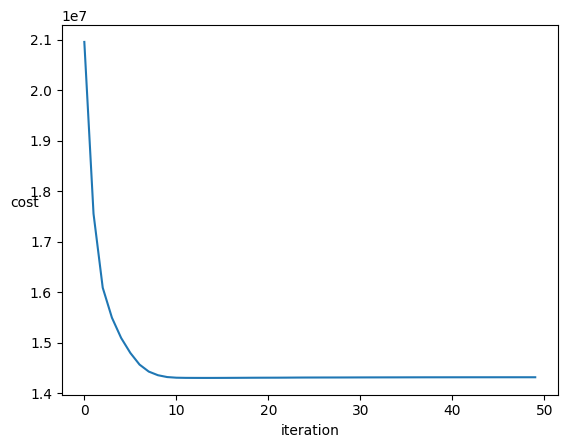

In [128]:
iter_count = len(costs)

print(f"Number of clusters: {len(clusters)}")
print("Centroids: ")
for centroid in centroids:
    print(f"\t- ({centroid[0]}, {centroid[1]}, {centroid[2]})")
print("Clusters")
for i in range(len(clusters)):
    print(f"\tCluster {i}: {len(clusters[i])} pixels")
print(f"Iteration Count: {len(costs)}")

index = np.arange(0, iter_count, 1)

plt.xlabel('iteration')
plt.ylabel('cost', rotation=0)

plt.plot(index, costs)
plt.show()


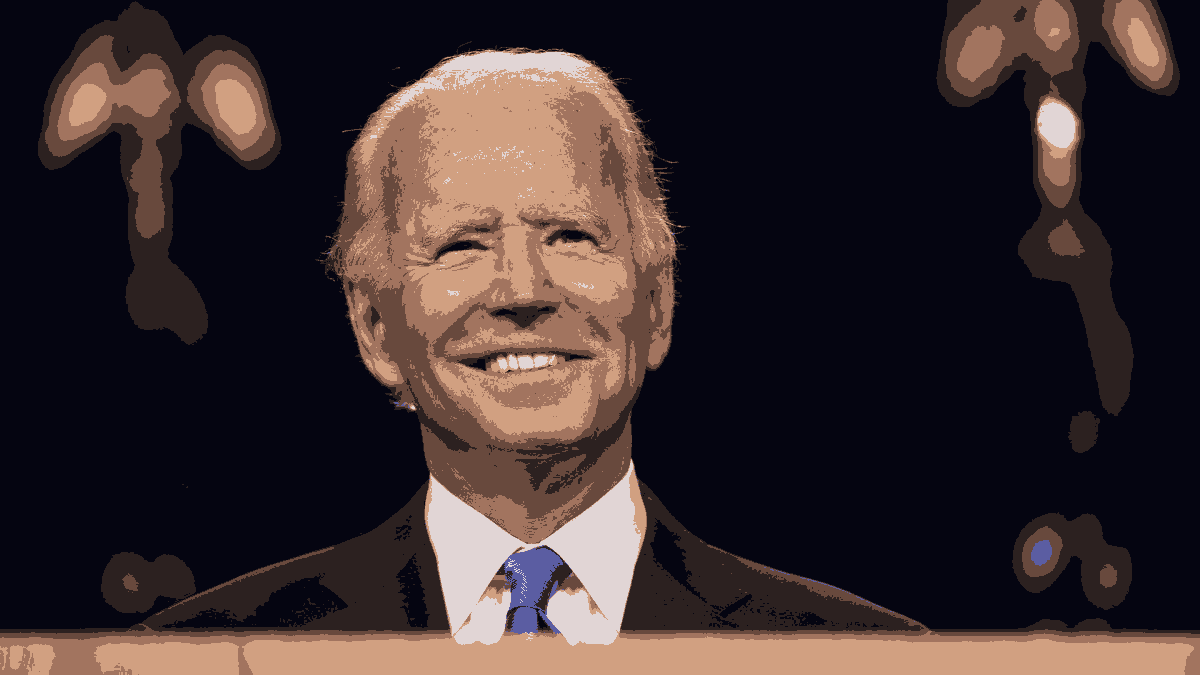

In [150]:
new_data = data.copy()
def get_nearest_centroid(point: np.ndarray, centroids: List[np.ndarray]) -> np.ndarray:
    """
    Returns the nearest centroid.
    """
    smallest_centroid_i = len(centroids)
    smallest_distance = np.infty
    for i in range(len(centroids)):
        centroid = centroids[i]
        distance = get_euclidean_distance(point, centroid)
        if distance < smallest_distance:
            smallest_distance = distance
            smallest_centroid_i = i
            if smallest_distance == 0:
                break
    return centroids[smallest_centroid_i]

with Image.open("./data/1/hw2_img.jpg") as im:
    size = im.size
    im.convert("RGB")
    old_data = np.asarray(im.getdata(), dtype=np.float32)
    new_data = []
    for i in range(len(old_data)):
        numpy_value = get_nearest_centroid(old_data[i], centroids)
        # type of the values here are numpy values -- not accepted by pillow
        # need to convert
        new_data.append(tuple([int(val) for val in numpy_value]))
    im.putdata(new_data)
    display(im)

## 2. K-Medoids

In [151]:
import numpy as np

def get_euclidean_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    """
    Returns the Euclidean distance between `p1` and `p2`.
    """
    distance_vector = p1 - p2
    squared_dist = np.dot(distance_vector, distance_vector.T)
    return np.sqrt(squared_dist)

def get_manhattan_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    """
    Returns the Manhattan distance between `p1` and `p2`.
    """
    distance_vector = p1 - p2
    abs_dist = np.sum([np.abs(elem) for elem in distance_vector])
    return abs_dist

def get_linf_distance(p1: np.ndarray, p2: np.ndarray) -> float:
    """
    Returns the maximum absolute distance between `p1` and `p2`.
    """
    distance_vector = p1 - p2
    max_dist = np.max([np.abs(elem) for elem in distance_vector])
    return max_dist

def pretty_table(points, dist_fn):
    first_row = "   : "
    for j in range(len(points)):
        first_row += f"   x_{j}   "
    print(first_row)
    for i in range(len(points)):
        p1 = points[i]
        row_str = f"x_{i}: "
        for j in range(len(points)):
            p2 = points[j]
            distance = float(dist_fn(p1, p2))
            row_str += f" {distance:^7.5} "
        print(row_str)

In [152]:
x_0 = np.array([ 0,  0])
x_1 = np.array([ 4,  4])
x_2 = np.array([ 0, -6])
x_3 = np.array([-5,  2])

points = [x_0, x_1, x_2, x_3]

print("Manhattan Distances:")
pretty_table(points, get_manhattan_distance)
print("\nEuclidean Distances:")
pretty_table(points, get_euclidean_distance)
print("\nMaximum Distances:")
pretty_table(points, get_linf_distance)

Manhattan Distances:
   :    x_0      x_1      x_2      x_3   
x_0:    0.0      8.0      6.0      7.0   
x_1:    8.0      0.0     14.0     11.0   
x_2:    6.0     14.0      0.0     13.0   
x_3:    7.0     11.0     13.0      0.0   

Euclidean Distances:
   :    x_0      x_1      x_2      x_3   
x_0:    0.0    5.6569     6.0    5.3852  
x_1:  5.6569     0.0     10.77   9.2195  
x_2:    6.0     10.77     0.0     9.434  
x_3:  5.3852   9.2195    9.434     0.0   

Maximum Distances:
   :    x_0      x_1      x_2      x_3   
x_0:    0.0      4.0      6.0      5.0   
x_1:    4.0      0.0     10.0      9.0   
x_2:    6.0     10.0      0.0      8.0   
x_3:    5.0      9.0      8.0      0.0   


**A**: $l_\infty$ distance.
- $x_0$ and $x_1$ are in the same category, hence the distances between them should be the smallest. This only applies if the distance measure was the $l_\infty$ distance.

**B**: $l_2$ distance
- $x_0$ and $x_3$ are in the same category, hence the distances between them should be the smallest. This only applies if the distance measure was the Euclidean distance.

**C**: $l_1$ distance
- $x_0$ and $x_2$ are in the same category, hence the distances between them should be the smallest. This only applies if the distance measure was the Manhattan distance.